Feature weight in Random Forest algorithm

/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['comment'] = x_train['comment'].apply(DataProcesser.remove_stopwords)
/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['comment'] = x_test['comment'].apply(DataProcesser.remove_stopwords)
/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:103: SettingWithCopyWarning: 
A value is tr

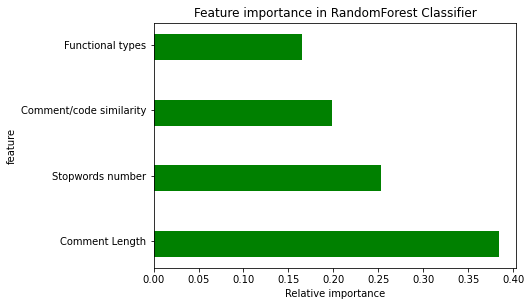

<Figure size 360x360 with 0 Axes>

In [1]:
from models.model_exec import ModelExec
import numpy as np
import matplotlib.pyplot as plt

model_exec = ModelExec()
model = model_exec.execute_model('RandomForest')
model = model.get_model()

def get_plot_weight(col):
    y = model.feature_importances_
    # plot
    fig, ax = plt.subplots()
    width = 0.4  # the width of the bars
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color="green")
    ax.set_yticks(ind + width / 10)
    ax.set_yticklabels(col, minor=False)

    plt.title("Feature importance in RandomForest Classifier")
    plt.xlabel("Relative importance")
    plt.ylabel("feature")
    plt.figure(figsize=(5, 5))
    fig.set_size_inches(6.5, 4.5, forward=True)

get_plot_weight(["Comment Length", "Stopwords number", "Comment/code similarity", "Functional types"])

Feature weight in Random Forest algorithm with comments

In [2]:
model_exec = ModelExec(include_comments=True)
model = model_exec.execute_model('RandomForest')
model = model.get_model
get_plot_weight(["Comment Length", "Stopwords number", "Comment/code similarity", "Comments"])


/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['comment'] = x_train['comment'].apply(DataProcesser.remove_stopwords)
/home/patrycja/PycharmProjects/scientificProject1/models/model_exec.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['comment'] = x_test['comment'].apply(DataProcesser.remove_stopwords)


AttributeError: 'function' object has no attribute 'feature_importances_'

Get decision trees in Random Forest algorithm

In [ ]:
estimator = model.estimators_[5]
from sklearn.tree import export_graphviz

export_graphviz(estimator,
                out_file='tree.dot',
                feature_names = ["Comment Length", "Stopwords number", "Comment/code similarity"],
                class_names = ['non-information: yes', 'non-information: no'],
                rounded = True, proportion = False,
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image

Image(filename = 'tree.png')